# AI Engineer Pitch Deck Generator

This notebook demonstrates the pitch deck generator for AI Makerspace Bootcamp students. It leverages LangGraph's structured workflow to help students create compelling pitch decks for Demo Day.

In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/donbr/open_deep_research/src


In [2]:
# import uuid
# import asyncio
# from typing import Optional, Dict, Any
# from langchain_core.runnables import RunnableConfig

# from open_deep_research.pitch_graph import graph
from open_deep_research.configuration import SearchAPI

In [3]:
# Import required modules and initialize the builder from open_deep_research
import uuid 
import os, getpass
import open_deep_research   
print(open_deep_research.__version__) 
from IPython.display import Image, display, Markdown
from langgraph.types import Command
from langgraph.checkpoint.memory import MemorySaver
from open_deep_research.pitch_graph import builder

0.0.15


In [4]:
# Create a memory-based checkpointer and compile the graph
# This enables state persistence and tracking throughout the workflow execution

memory = MemorySaver()
graph = builder.compile(checkpointer=memory)

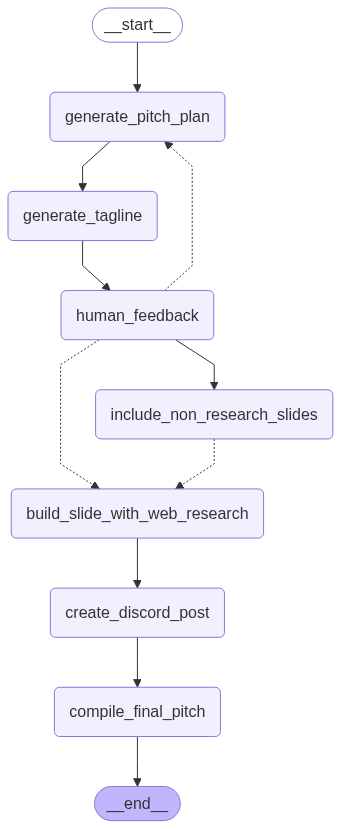

In [5]:
# Visualize the graph structure
# This shows the nodes and edges in the research workflow

display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

## Configuration

Configure the pitch deck generator with your preferred models and settings. You can customize:
- Model providers and models
- Search API for research
- Number of queries and research iterations
- MCP integration (if enabled)

In [6]:
# Basic configuration
config = {
    "configurable": {
        "thread_id": str(uuid.uuid4()),
        "number_of_queries": 2,  # Number of search queries to generate per section
        "max_search_depth": 2,  # Maximum number of research iterations
        
        # Models
        "planner_provider": "anthropic",  # Provider for planning model
        "planner_model": "claude-3-7-sonnet-latest",  # Model for planning
        "writer_provider": "anthropic",  # Provider for writing model
        "writer_model": "claude-3-5-sonnet-latest",  # Model for writing
        
        # Search API
        "search_api": SearchAPI.TAVILY,  # Web search API
        
        # Pitch deck specific settings
        "include_visuals": True,  # Include visual suggestions
        "discord_integration": True,  # Format content for Discord
        "enable_mcp": False,  # Enable MCP integration (if available)
        
        # Required for pitch organization
        "pitch_organization": "Standard startup pitch format with Problem, Solution, Market, Business Model, Team, and Call to Action slides"
    }
}

# Advanced configuration (optional)
# Uncomment and modify as needed

# For specialized search APIs like Exa
# config["configurable"]["search_api"] = SearchAPI.EXA
# config["configurable"]["search_api_config"] = {
#     "num_results": 3,
#     "include_domains": ["medium.com", "ycombinator.com"]
# }

# For MCP integration
# config["configurable"]["enable_mcp"] = True
# config["configurable"]["mcp_server_url"] = "http://localhost:8000"

## Generate a Pitch Deck

Use the configuration to generate a pitch deck for your AI project. The workflow will:
1. Create a structured plan with 5-7 slides
2. Generate a catchy tagline
3. Research and write content for each slide
4. Suggest visuals to enhance each slide
5. Format a Discord post to share your pitch
6. Compile the complete pitch deck

In [7]:
# Set your project topic here
project_topic = "An AI assistant that helps students create persuasive pitch decks for Demo Day"

# Generate the pitch deck
async def generate_pitch():
    result = await graph.ainvoke(
        {"topic": project_topic},
        config=config
    )
    return result

# Run the generation
pitch_result = await generate_pitch()
pitch_result

{'__interrupt__': [Interrupt(value="Please review this pitch deck plan for: An AI assistant that helps students create persuasive pitch decks for Demo Day\n                        \n                        Tagline: From Pitch Panic to Presentation Perfect\n                        \n                        Slide: Problem\nDescription: Highlight how students struggle with creating compelling pitch decks, wasting hours and still delivering subpar results. Emphasize the high stakes of Demo Day presentations and how poor pitches can sink great ideas. Focus on both time waste and lost opportunities.\nResearch needed: Yes\n\n\nSlide: Solution\nDescription: Introduce our AI-powered pitch deck assistant that helps students create professional-quality presentations in minutes. Highlight key features: smart content suggestions, design optimization, and real-time feedback. Emphasize how it combines human creativity with AI efficiency.\nResearch needed: No\n\n\nSlide: Market & Opportunity\nDescript

## Display the Final Pitch Deck

The output includes a complete pitch deck with slides and a formatted Discord post.

In [8]:
## Display the generated pitch deck content
for section, content in pitch_result.items():
    print(f"### {section}")
    if isinstance(content, str):
        display(Markdown(content))
    elif isinstance(content, list):
        for item in content:
            display(Markdown(f"- {item}"))
    else:
        print(content)  # Handle other types if necessary

### __interrupt__


- Interrupt(value="Please review this pitch deck plan for: An AI assistant that helps students create persuasive pitch decks for Demo Day\n                        \n                        Tagline: From Pitch Panic to Presentation Perfect\n                        \n                        Slide: Problem\nDescription: Highlight how students struggle with creating compelling pitch decks, wasting hours and still delivering subpar results. Emphasize the high stakes of Demo Day presentations and how poor pitches can sink great ideas. Focus on both time waste and lost opportunities.\nResearch needed: Yes\n\n\nSlide: Solution\nDescription: Introduce our AI-powered pitch deck assistant that helps students create professional-quality presentations in minutes. Highlight key features: smart content suggestions, design optimization, and real-time feedback. Emphasize how it combines human creativity with AI efficiency.\nResearch needed: No\n\n\nSlide: Market & Opportunity\nDescription: Present the massive TAM of university students and startup founders globally. Show growth trends in entrepreneurship education and pitch competitions. Highlight how existing presentation tools miss the mark for pitch-specific needs.\nResearch needed: Yes\n\n\nSlide: Business Model\nDescription: Outline our B2B2C approach targeting universities and accelerators, with individual student subscriptions. Show pricing tiers and projected revenue streams. Highlight partnership opportunities with major educational institutions.\nResearch needed: No\n\n\nSlide: Team & Traction\nDescription: Showcase our unique blend of AI expertise and entrepreneurship education background. Highlight any early adopters or pilot programs. Emphasize our team's firsthand experience with the problem and technical capability to solve it.\nResearch needed: No\n\n\nSlide: Call to Action\nDescription: Clear investment ask with specific use of funds: product development, market expansion, and team growth. Include key milestones for next 18 months and expected outcomes. End with powerful vision of transforming how future entrepreneurs present their ideas.\nResearch needed: No\n\n                        \n                        Does this pitch plan meet your needs?\n                        Pass 'true' to approve the pitch plan.\n                        Or, provide feedback to regenerate the pitch plan:", resumable=True, ns=['human_feedback:90ae43ad-64cd-9d4a-62c1-ae1f8e781d44'])

In [ ]:
# Display the pitch deck
from IPython.display import Markdown

Markdown(pitch_result["final_pitch"])

## Discord Post Format

Here's the formatted content for sharing your pitch on Discord:

In [ ]:
# Display Discord post
discord_post = pitch_result["discord_post"]

print(f"Title: {discord_post['title']}\n")
print(f"Message:\n{discord_post['message']}\n")
print(f"Suggested Image: {discord_post['picture_suggestion']}")

## Next Steps

Now that you have your pitch deck generated, you can:

1. **Create Visuals**: Use the suggestions to create actual visuals with Canva, PowerPoint, or other tools
2. **Post to Discord**: Share your pitch with the community using the formatted content
3. **Practice Delivery**: Use the slide content as a script for practice pitches
4. **Get Feedback**: Share with mentors and peers for iterative improvement
5. **Export to Presentation**: Create a final slide deck for Demo Day

## MCP Integration (Advanced)

If you have MCP enabled, you can use specialized tools for enhanced pitch capabilities:

In [ ]:
# Uncomment if using MCP

# from modelcontextprotocol.client import MCPClient
# from modelcontextprotocol.schema import ExecuteToolParams

# # Connect to MCP server
# mcp_client = MCPClient(
#     server_url=config["configurable"]["mcp_server_url"],
#     client_name="pitch-deck-enhancer"
# )

# # Get available tools
# tools = await mcp_client.list_tools()
# print("Available MCP tools:")
# for tool in tools:
#     print(f"- {tool.name}: {tool.description}")

# # Example: Use MCP to enhance a slide with market data
# market_data_params = ExecuteToolParams(
#     name="fetch_market_data",
#     arguments={
#         "query": "AI pitch deck assistant market size",
#         "slide_type": "Market"
#     }
# )
# market_data_result = await mcp_client.execute_tool(market_data_params)
# print(market_data_result.content)